![](https://witsq.github.io/images/banner.png)

# Quantum Fourier Estimation using Qiskit Aqua
_Conrad Haupt, WitsQ Team_

Based on the Qiskit Textbook

$\newcommand{\ket}[1]{\left|\,{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle\,{#1}\right|}$
$\newcommand{\abs}[1]{\left|{#1}\right|}$

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import IBMQ, BasicAer,aqua
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua.components import qfts,iqfts

# QFT vs DFT

In classical computing, we typically want to calculate the Discrete Fourier Transform (DFT) of some time-series data to see which frequency components are present. This is represented as:

<center>
$y_k = \frac{1}{\sqrt{N}}\Sigma_{j=0}^{N-1}{\left(x_j\omega_N^{jk}\right)}$
</center>

where
<center>
$\omega_N^{jk} = e^{2\pi i\frac{jk}{N}}$
</center>

The Quantum Fourier Transform (QFT) is the quantum analog of the DFT and is described as the mapping:

<center>
$\ket{x}\mapsto\frac{1}{\sqrt{N}}\Sigma_{y=0}^{N-1}{\left(\omega_N^{xy}\ket{y}\right)}$
</center>

# Getting a pre-built QFT circuit from Aqua

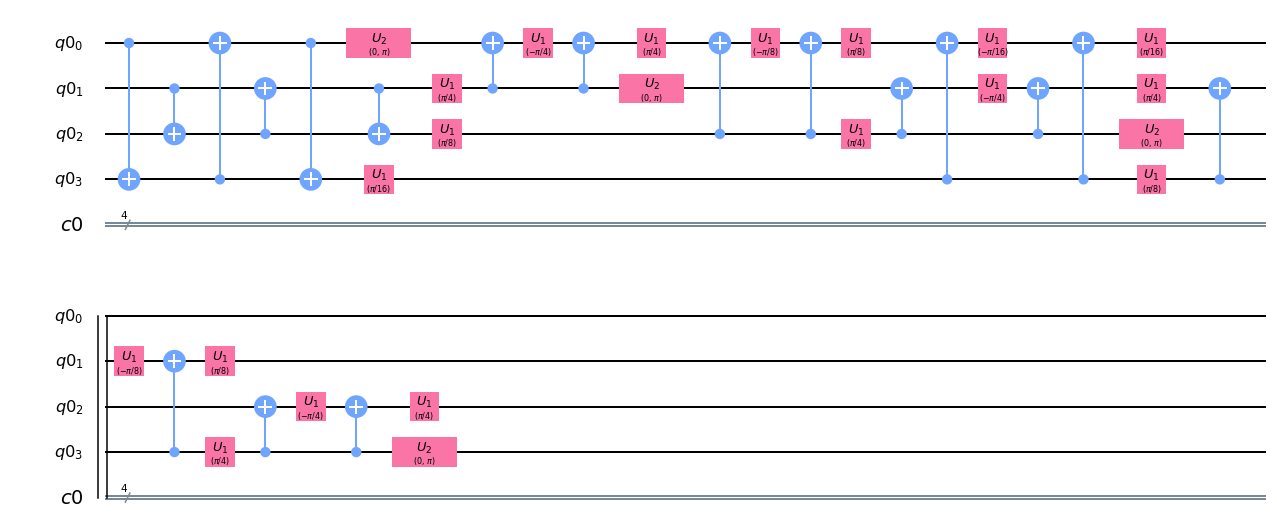

In [2]:
# Let's get a circuit representing the Inverse Quantum Fourier Transform

# Create a circuit with 4 qubits and 4 bits
qr_qft = QuantumRegister(4)
cr_qft = ClassicalRegister(4)
circ_qft = QuantumCircuit(qr_qft,cr_qft)

# To add a QFT sub-circuit, we need to construct it onto our
# circuit in a similar way to how we appended a sub-circuit
# in the previous lab
qft_builder = qfts.Standard(4)
qft_builder.construct_circuit(
    circuit=circ_qft, # The circuit on which we will add our QFT circuit
    qubits=qr_qft     # The qubits on which to apply the QFT circuit
)
circ_qft.draw(output='mpl')

# Quantum Phase Estimation

## Ex. 1: Use Aqua to construct a QPE estimation circuit

In [3]:
from qiskit.aqua.circuits import PhaseEstimationCircuit
from qiskit.quantum_info import Pauli
from qiskit.aqua.operators import WeightedPauliOperator

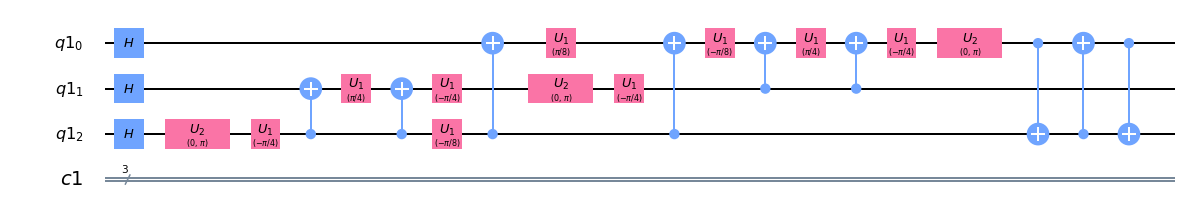

In [4]:

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circ = QuantumCircuit(qr,cr)
circ.h(qr)
circ_iqft = iqfts.Standard(3).construct_circuit(circuit=circ,qubits=qr)
qpe_builder = PhaseEstimationCircuit(
    WeightedPauliOperator([[1,Pauli(z=[0],x=[1])]]),
    iqft=iqfts.Standard(3)
)
circ_iqft.draw(output='mpl')

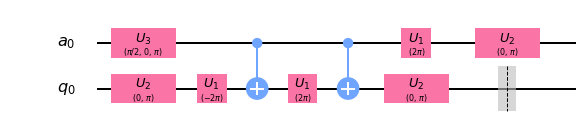

In [5]:
qpe = qpe_builder.construct_circuit()
qpe.draw(output='mpl')

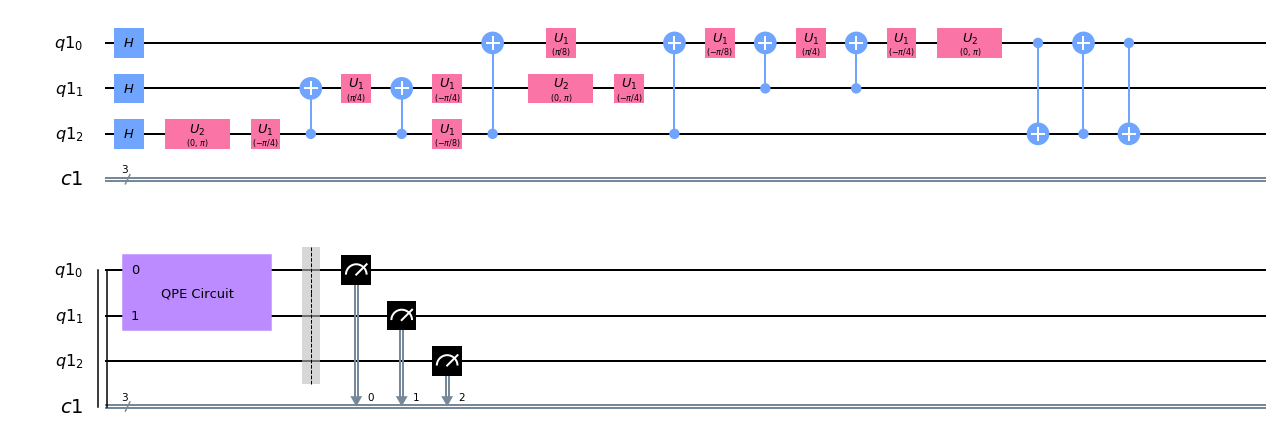

In [6]:
qpe.name = 'QPE Circuit'
qpe.to_instruction()
circ.append(qpe.to_instruction(),qr[0:2])
circ.barrier()
circ.measure(qr,cr)
circ.draw()

# Simulate QFT

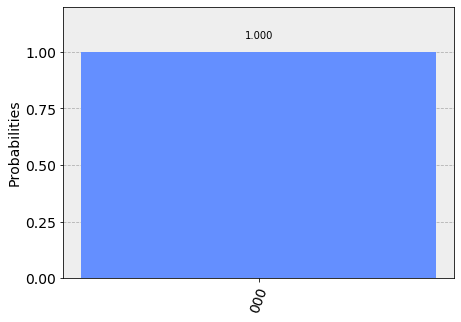

In [7]:
device = BasicAer.get_backend('qasm_simulator')
results = execute(circ,backend=device)
plot_histogram(results.result().get_counts())